In [27]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "bellabeat-analysis"

![bellabeat logo](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRLX-tdij_MQ7lDd2bjJxA5BGQra7ELOWAJklDKmQTE&s)

**About the company:**

Bellabeat is a technology company focused on wearable health-centric products for women. Bellabeat has found success and is looking for growth to become a power-player in the global smart device market. Founders Urška Sršen and Sando Mur, designed their technology to inform and empower women around the world to be more cognisant about their health and habits. Bellabeat wearables collect data on activity, sleep, stress, and reproductive health. In addition to diffrent wearable options, these trackers are accompanied by the Bellabeat app to provide feedback and help users understand the data and their habits. Lastly, they even have a waterbottle which utilizes smart technology to track user water intake to make sure they’re properly hydrated. 

Guiding Questions from stakeholders:

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

**Ask:**

Guiding Questions for Analysis:
1. What is the problem you are trying to solve?

 - The problem we are trying to solve is to analyze smart device usage data and how to use that data to drive new business decisions.

2. How can your insights drive business decisions?

 - We can take the insights from our analysis to recommended actual data-backed suggestions on how to grow and improve Bellabeat.

Key Tasks: 
1. Identify the business task

- The business task is as stated above. To analyze usage data and report our findings with recommendations on improvements to the stakeholders.

2. Consider key stakeholders

 - Urska Srsen: Co-founder and CCO
 - Sando Mur: Co-founder and Mathematician (executive team member)
 
Deliverable:
1. Clear statement of business task
 - Analyze fitbit tracker data to gain insight into usage trends and how those trends can be leveraged by the marketing team to identify new growth opportunities. It is important to note that this tracker data is not first-party from Bellabeat consumers. This is third-party data analyzed from a rival smart device called FitBit. Gaining insights from other competitor’s wearables can help Bellabeat with new strategies. 

**Prepare:**

Guiding Questions:
1. Where is your data stored?

 - This data is stored on kaggle and was made by Mobius
 
2. How is the data organized? Is it long or wide format?

 - The data is organized in long format and consists of 18 .csv files in total
 
3. Are there issues with bias or credibility in this data? Does your data ROCCC?

 - Reliable - LOW this dataset only has a sample size of 30 which is the lowest recommended sample size. There are also many other unknown factors such as age, gender, and height.
 - Original - LOW this is third party data collected by Amazon Mechanical Turk between 03.12.2016-05.12.2016
 - Comprehensive - MEDIUM data contains a variety of variables including minute-level output for physical activity, heart rate, and sleep monitoring
 - Current - LOW data collected is from almost 7 years ago, a lot about a person’s lifestyle can change in that time 
 - Cited - HIGH the source and data collected is well documented
 
4. How are you addressing licensing, privacy, security, and accessibility?

 - This data is CC0: Public domain so it is free to use for the public
 
5. How did you verify the data’s integrity?

 - The data was easily accessible, transferable, and has a 10/10 usability score from Kaggle assuring its integrity
 
6. How does it help you answer your question?

 - This dataset will provide insight into the usage patterns of FitBit wearers

7. Are there any problems with the data?

 - At first glance there are no apparent problems with the data.

Key Tasks:
1. Download data and store it appropriately

 - The data was downloaded and stored in a folder named “bellabeat_casestudy”. Inside that folder was another name “FitBit Data 4.12.16-5.12.16” which holds the 18 .csv files we can use.

2. Identify how it’s organized 

 - Data is organized by scale: minute, hourly, daily and by type: activity, sleep, weight, etc.

3. Sort and filter the data

4. Determine the credibility of the data

Deliverables:
1. A description of all the data sources used
I will use Microsoft Excel for data cleaning

**Process:**

Guiding questions:

1. What tools are you choosing and why?  

 - The tools I am choosing are Excel and R. I chose Excel because the datasets we’re working with are not large enough to warrant SQL. I am using R for my analysis because it has both data cleaning and visualization capabilities within its platform.

2. Have you ensured your data’s integrity? 

 - Yes, I have ensured the data’s integrity by using conditional formatting to make sure all of the values make sense in the associated columns. For example, I made sure that there were no negative values because that wouldn’t make sense given our column names and what we’re analyzing. 

3. What steps have you taken to ensure that your data is clean? 

 - I utilized conditional formatting in Excel to make sure there are no missing values, and if there were any, to make note of it. Again, I also checked to see if there were any negative values.

4. How can you verify that your data is clean and ready to analyze? 

 - See the steps I have taken above. 

5. Have you documented your cleaning process so you can review and share those results?

 - Yes, see below.

Data Cleaning:
 - Used excel to clean datasets since the sample size is small
 - Found duplicate data using conditional formatting in multiple sheets with redundant data, so I won't be using them moving forward in my analysis.
 - Total_distance and tracker_distance repeat the same values so i will be deleting the column tracker_distance
 - There is no associated metric with distance…is it miles or kilometers?
 - Daily activity contains all of the data also found in daily_steps and daily_intensities, so for simplicity sake I will just be using the daily_activity sheet
 - The other two sheets I will be using in my analysis are weight_log and daily_sleep
 - In daily_sleep there are only 8 unique user_ids with data, many of which manually inputted the data, and many of which did not record data everyday in the observed time period. Due to such a small sample size, I won’t be able to gather any statistically significant findings using this data.

Analyze: 

 - Here is my analysis in R including the code chunks and their outputs.

In [28]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

**Loading Datasets to be Used:**

Here we're going to load the three data sets that we'll be using in our analysis, which we'll call daily_activity, daily_sleep, and weight_log. 

In [29]:
daily_activity <- read.csv("/kaggle/input/bellabeat-analysis/daily_activity_cleaned.csv")
daily_sleep <- read.csv("/kaggle/input/bellabeat-analysis/daily_sleep_cleaned.csv")
weight_log <- read.csv("/kaggle/input/bellabeat-analysis/weight_log_cleaned.csv")

**Exploring Key Tables:**

Let's preview all of our datasets to make sure they imported properly.

In [30]:
head(daily_activity)
head(daily_sleep)
head(weight_log)

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/16,13162,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/16,10735,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/16,10460,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/16,9762,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/16,12669,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/16,9705,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,X,X.1
,<dbl>,<chr>,<int>,<int>,<int>,<lgl>,<lgl>
1,1503960366,4/12/16,1,327,346,NA,NA
2,1503960366,4/13/16,2,384,407,NA,NA
3,1503960366,4/15/16,1,412,442,NA,NA
4,1503960366,4/16/16,2,340,367,NA,NA
5,1503960366,4/17/16,1,700,712,NA,NA
6,1503960366,4/19/16,1,304,320,NA,NA


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,Date.and.Time
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<lgl>,<dbl>,<chr>
1,1503960366,05-02-2016,52.6,115.9631,22,22.65,TRUE,1.46223e+12,5/2/16 23:59
2,1503960366,05-03-2016,52.6,115.9631,NA,22.65,TRUE,1.46232e+12,5/3/16 23:59
3,1927972279,04-13-2016,133.5,294.3171,NA,47.54,FALSE,1.46051e+12,4/13/16 1:08
4,2873212765,04-21-2016,56.7,125.0021,NA,21.45,TRUE,1.46128e+12,4/21/16 23:59
5,2873212765,05-12-2016,57.3,126.3249,NA,21.69,TRUE,1.46310e+12,5/12/16 23:59
6,4319703577,04-17-2016,72.4,159.6147,25,27.45,TRUE,1.46094e+12,4/17/16 23:59


Now, let's see the column names in our datasets.

In [31]:
colnames(daily_activity)
colnames(daily_sleep)
colnames(weight_log)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "LoggedActivitiesDistance" "VeryActiveDistance"      
 [7] "ModeratelyActiveDistance" "LightActiveDistance"     
 [9] "SedentaryActiveDistance"  "VeryActiveMinutes"       
[11] "FairlyActiveMinutes"      "LightlyActiveMinutes"    
[13] "SedentaryMinutes"         "Calories"

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"     "X"                 
[7] "X.1"

[1] "Id"             "Date"           "WeightKg"       "WeightPounds"  
[5] "Fat"            "BMI"            "IsManualReport" "LogId"         
[9] "Date.and.Time"

Note that all of our datasets have an "Id" column which we can use to merge the datasets later on. 

**Formatting the Date to be Recognized by R**

In its current format, the date is categorized as a character and not a date. We need to change the format so that R recognizes these columns as dates.

In [32]:
#daily_activity
daily_activity$ActivityDate = as.POSIXct(daily_activity$ActivityDate, format = "%m/%d/%Y", tz = Sys.timezone())

#daily_sleep
daily_sleep$SleepDay = as.POSIXct(daily_sleep$SleepDay, format = "%m/%d/%Y", tz = Sys.timezone())

#weight_log
weight_log$Date.and.Time = as.POSIXct(weight_log$Date.and.Time, format = "%m/%d/%Y", tz = Sys.timezone())


Lets check to see that all of the appropriate columns were changed to date format.

In [33]:
head(daily_activity)
head(daily_sleep)
head(weight_log)

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,16-04-12,13162,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,16-04-13,10735,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,16-04-14,10460,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,16-04-15,9762,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,16-04-16,12669,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,16-04-17,9705,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,X,X.1
,<dbl>,<dttm>,<int>,<int>,<int>,<lgl>,<lgl>
1,1503960366,16-04-12,1,327,346,NA,NA
2,1503960366,16-04-13,2,384,407,NA,NA
3,1503960366,16-04-15,1,412,442,NA,NA
4,1503960366,16-04-16,2,340,367,NA,NA
5,1503960366,16-04-17,1,700,712,NA,NA
6,1503960366,16-04-19,1,304,320,NA,NA


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,Date.and.Time
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<lgl>,<dbl>,<dttm>
1,1503960366,05-02-2016,52.6,115.9631,22,22.65,TRUE,1.46223e+12,16-05-02
2,1503960366,05-03-2016,52.6,115.9631,NA,22.65,TRUE,1.46232e+12,16-05-03
3,1927972279,04-13-2016,133.5,294.3171,NA,47.54,FALSE,1.46051e+12,16-04-13
4,2873212765,04-21-2016,56.7,125.0021,NA,21.45,TRUE,1.46128e+12,16-04-21
5,2873212765,05-12-2016,57.3,126.3249,NA,21.69,TRUE,1.46310e+12,16-05-12
6,4319703577,04-17-2016,72.4,159.6147,25,27.45,TRUE,1.46094e+12,16-04-17


**Understanding Summary Statistics**

How many unique participants are there in each dataframe? It looks like there may be more participants in the daily activity dataset than the sleep dataset.

In [34]:
n_distinct(daily_activity$Id)
n_distinct(daily_sleep$Id)
n_distinct(weight_log$Id)

[1] 33

[1] 24

[1] 8

We see that there are only 8 distinct users in weight_log. Due to such a small sample size we wont be able to pull any statistically significant findings with this data.

In [35]:
nrow(daily_activity)
nrow(daily_sleep)
nrow(weight_log)

[1] 940

[1] 413

[1] 67

weight_log also has the least number of data inputs at only 67, furthering our case not to use this dataset in our analysis.

Let's take a look at the summary statistics for our datasets.

In [36]:
daily_activity %>%  
  select(TotalSteps,
         TotalDistance,
         VeryActiveMinutes,
         FairlyActiveMinutes,
         LightlyActiveMinutes,
         SedentaryMinutes,
         Calories) %>%
  summary()

   TotalSteps    TotalDistance    VeryActiveMinutes FairlyActiveMinutes
 Min.   :    0   Min.   : 0.000   Min.   :  0.00    Min.   :  0.00     
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:  0.00    1st Qu.:  0.00     
 Median : 7406   Median : 5.245   Median :  4.00    Median :  6.00     
 Mean   : 7638   Mean   : 5.490   Mean   : 21.16    Mean   : 13.56     
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.: 32.00    3rd Qu.: 19.00     
 Max.   :36019   Max.   :28.030   Max.   :210.00    Max.   :143.00     
 LightlyActiveMinutes SedentaryMinutes    Calories   
 Min.   :  0.0        Min.   :   0.0   Min.   :   0  
 1st Qu.:127.0        1st Qu.: 729.8   1st Qu.:1828  
 Median :199.0        Median :1057.5   Median :2134  
 Mean   :192.8        Mean   : 991.2   Mean   :2304  
 3rd Qu.:264.0        3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :518.0        Max.   :1440.0   Max.   :4900  

The summary of daily_activity shows us that the average steps per day is 7638 steps, which is actually quite good. The lowest is 0 which indicates that on some days users did not wear their watch. The 1st quartile is 3790 steps which is a little low. Bellabeat should consider sending a notification 1x per hour to remind the user to stand up and move. 

In [37]:
daily_sleep %>%  
  select(TotalSleepRecords,
  TotalMinutesAsleep,
  TotalTimeInBed) %>%
  summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

The summary of daily_sleep shows us that the average user is getting 419.5 minutes of sleep. This equates to just under 7 hours of sleep, which is less than the recommended 7-9 hours of sleep per night for adults. We can also see that average total time in bed is higher than total miutes asleep suggesting that users are having trouble falling or staying asleep.

In [38]:
weight_log %>%
  select(WeightPounds,
         -Fat,
         BMI)%>%
  summary()

  WeightPounds        BMI       
 Min.   :116.0   Min.   :21.45  
 1st Qu.:135.4   1st Qu.:23.96  
 Median :137.8   Median :24.39  
 Mean   :158.8   Mean   :25.19  
 3rd Qu.:187.5   3rd Qu.:25.56  
 Max.   :294.3   Max.   :47.54  

There are 65 NA values in the Fat column so we'll take that out of our analysis. Moreover, we won't be using weight_log data in our analysis due to the small sample size. This was just for practice. 

**Merging of Common Columns From Our Dataframes**

We have common columns of "Id" and "date" in both of our dataframes. However, we need to change both column names to "date" so we can merge them.

In [39]:
#daily_activity
colnames(daily_activity)[which(names(daily_activity) == "ActivityDate")] <- "date"

#daily_sleep
colnames(daily_sleep)[which(names(daily_sleep) == "SleepDay")] <- "date"

Let's check to see if it worked.

In [40]:
colnames(daily_activity)
colnames(daily_sleep)

[1] "Id"                       "date"                    
 [3] "TotalSteps"               "TotalDistance"           
 [5] "LoggedActivitiesDistance" "VeryActiveDistance"      
 [7] "ModeratelyActiveDistance" "LightActiveDistance"     
 [9] "SedentaryActiveDistance"  "VeryActiveMinutes"       
[11] "FairlyActiveMinutes"      "LightlyActiveMinutes"    
[13] "SedentaryMinutes"         "Calories"

[1] "Id"                 "date"               "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"     "X"                 
[7] "X.1"

Both "Id" and "date" columns are now the same so we can go ahead and merge these dataframes.

In [41]:
merged_data <- merge(daily_activity, daily_sleep, by=c("Id", "date"))

Let's take a look at the merged data.

In [42]:
head(merged_data)
n_distinct(merged_data$Id)
n_distinct(merged_data$date)

,Id,date,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,X,X.1
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>,<lgl>
1,1503960366,16-04-12,13162,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346,NA,NA
2,1503960366,16-04-13,10735,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407,NA,NA
3,1503960366,16-04-15,9762,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442,NA,NA
4,1503960366,16-04-16,12669,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367,NA,NA
5,1503960366,16-04-17,9705,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712,NA,NA
6,1503960366,16-04-19,15506,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320,NA,NA


[1] 24

[1] 31

**Plotting a Few Explorations**

What's the relationship between steps taken in a day and sedentary minutes? How could this help inform the customer segments that we can market to?

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


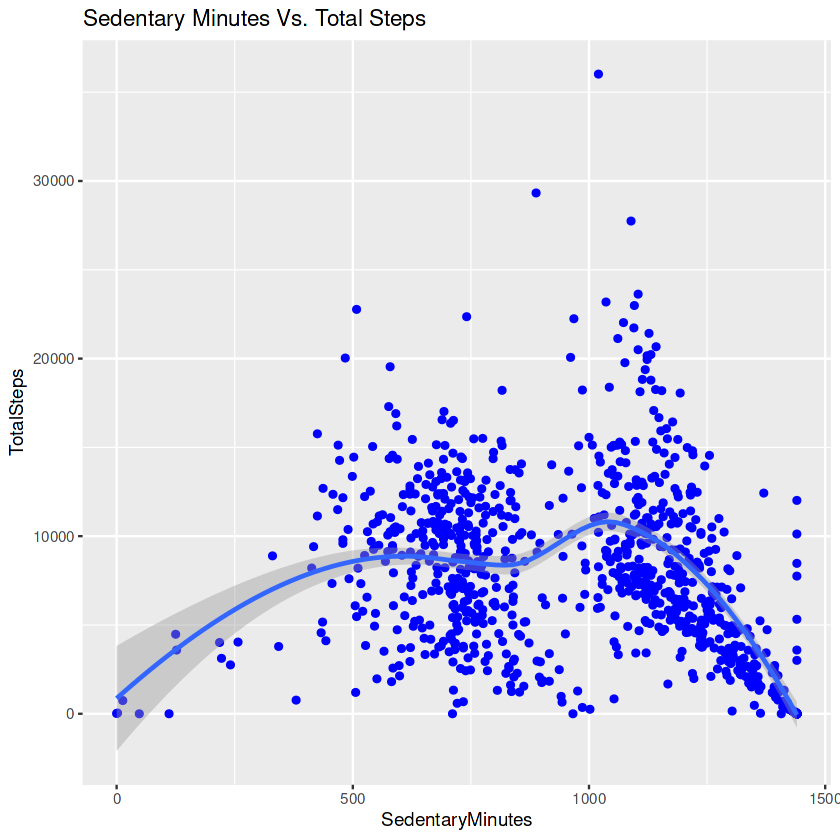

In [43]:
library(ggplot2)
ggplot(data=daily_activity, aes(x=SedentaryMinutes, y=TotalSteps)) + 
  geom_point(color='blue') + 
  geom_smooth() + 
  labs(title="Sedentary Minutes Vs. Total Steps")

From this visualization we can infer that there is a correlation between total steps and sedentary minutes. While it doesn't appear to be a strong correlation, we can see that higher sedentary minutes results in lower total steps and vice versa. 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


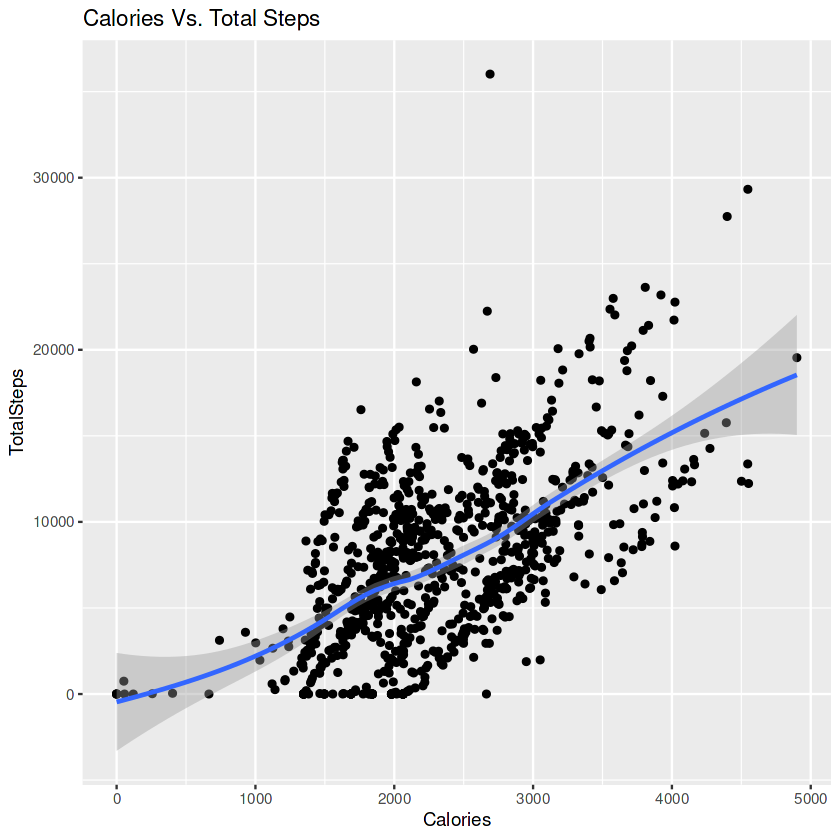

In [44]:
ggplot(data=daily_activity, aes(x=Calories, y=TotalSteps)) + 
  geom_point() + 
  geom_smooth() + 
  labs(title="Calories Vs. Total Steps")

We can see there is a positive correlation between Calories and TotalSteps. This makes perfect sense because the more you move, the more calories you will burn. 

What's the relationship between minutes asleep and time in bed? You might expect it to be almost completely linear - are there any unexpected trends?

To avoid any confusion we're going to change the column TotalTimeInBed to TotalMinutesInBed to make it clear how it is quantified. 

In [45]:
colnames(daily_sleep)[which(names(daily_sleep) == "TotalTimeInBed")] <- "TotalMinutesInBed"

In [46]:
SumTotalMinutesInBed <- sum(merged_data$TotalTimeInBed, na.rm = TRUE)
SumTotalMinutesAsleep <- sum(merged_data$TotalMinutesAsleep, na.rm = TRUE)

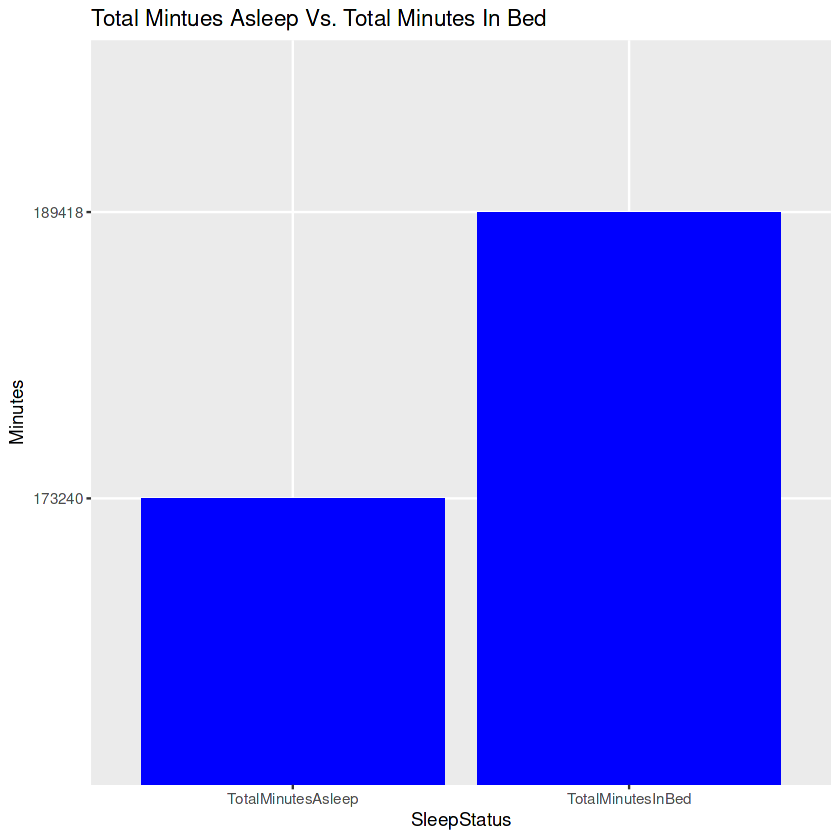

In [47]:
BarChart <- data.frame(
  SleepStatus=c("TotalMinutesAsleep","TotalMinutesInBed"),
  Minutes=c("173240","189418"))
ggplot(data=BarChart, aes(x=SleepStatus, y=Minutes)) + geom_bar(stat = "identity", fill="blue") + labs(title="Total Mintues Asleep Vs. Total Minutes In Bed")

Here we see a clear difference between TotalMinutesInBed and TotalMinutesAsleep. We see that there are some users that spend more time in bed than they do asleep. From this we can gather that some users have trouble falling or staying asleep. Another possibility is that some users wake up and stay in bed for some time in the mornings.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


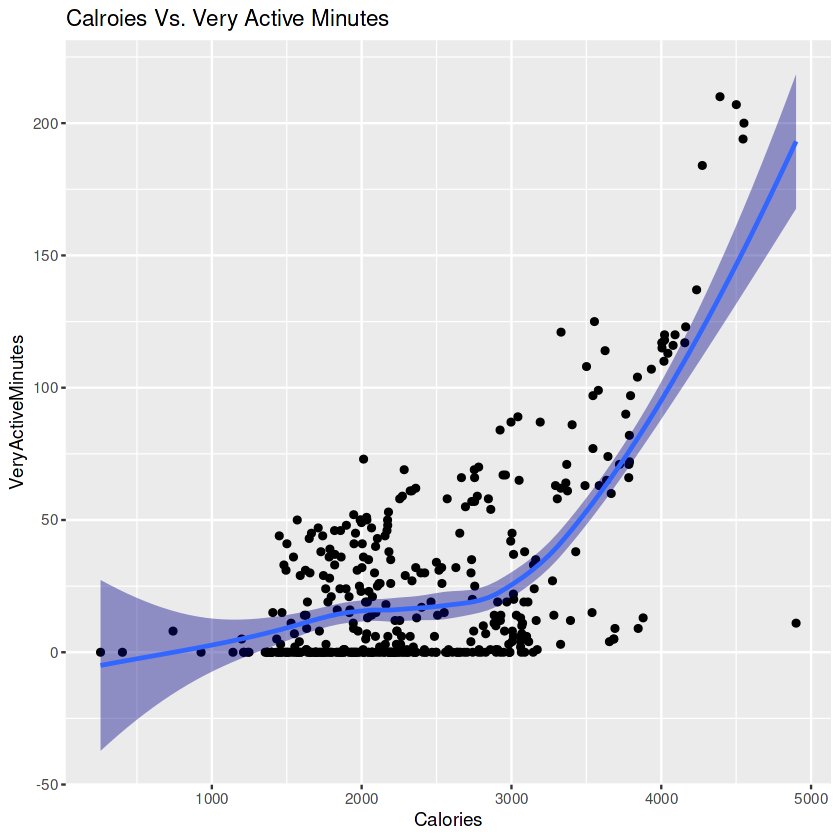

In [48]:
ggplot(merged_data, aes(x=Calories, y=VeryActiveMinutes)) + 
  geom_point(stat = "identity", fill='darkblue') + geom_smooth(fill='darkblue') + 
labs(title="Calroies Vs. Very Active Minutes")

From this graph we can see that there is a positive correlation between very active minutes and calories burned. This is logical because the more you move at a higher intensity, the more calories you will burn.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


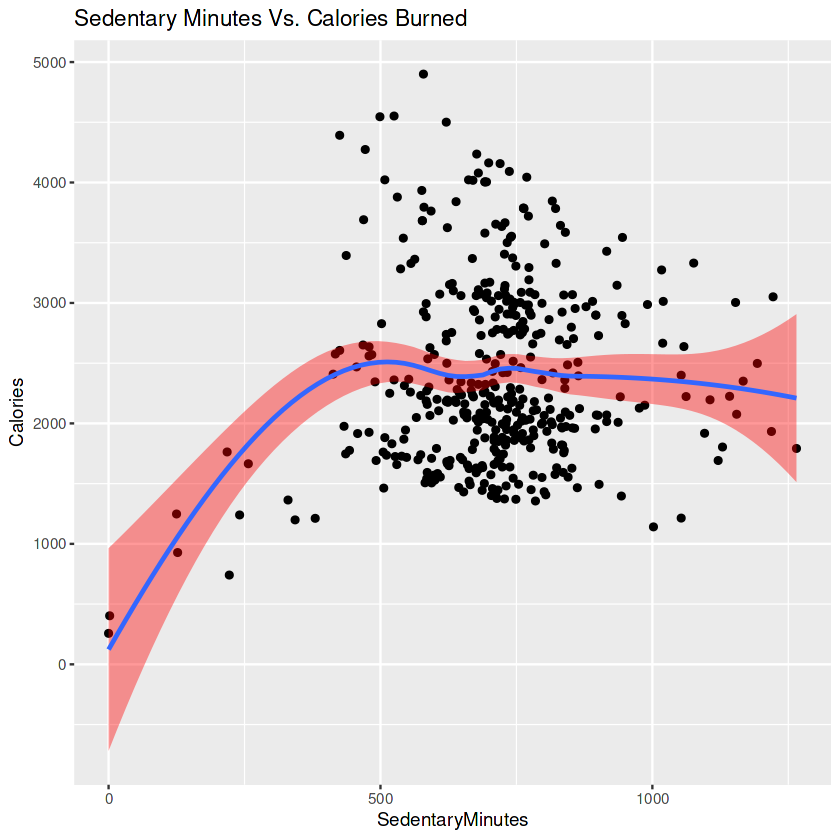

In [49]:
ggplot(merged_data, aes(x=SedentaryMinutes, y=Calories)) + 
  geom_point(stat = "identity") + geom_smooth(fill='red') + 
labs(title="Sedentary Minutes Vs. Calories Burned")

Here we see that sedentary minutes is not a great indicator of calories burned. A number of the data points are clustered between 500-1000 sedentary minutes per day, while calories in that cluster range between just under 1,500 all the way up to 4,000. This suggests there is not much of a correlation, and calories burned depends more on the active minutes and how intense those minutes are.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


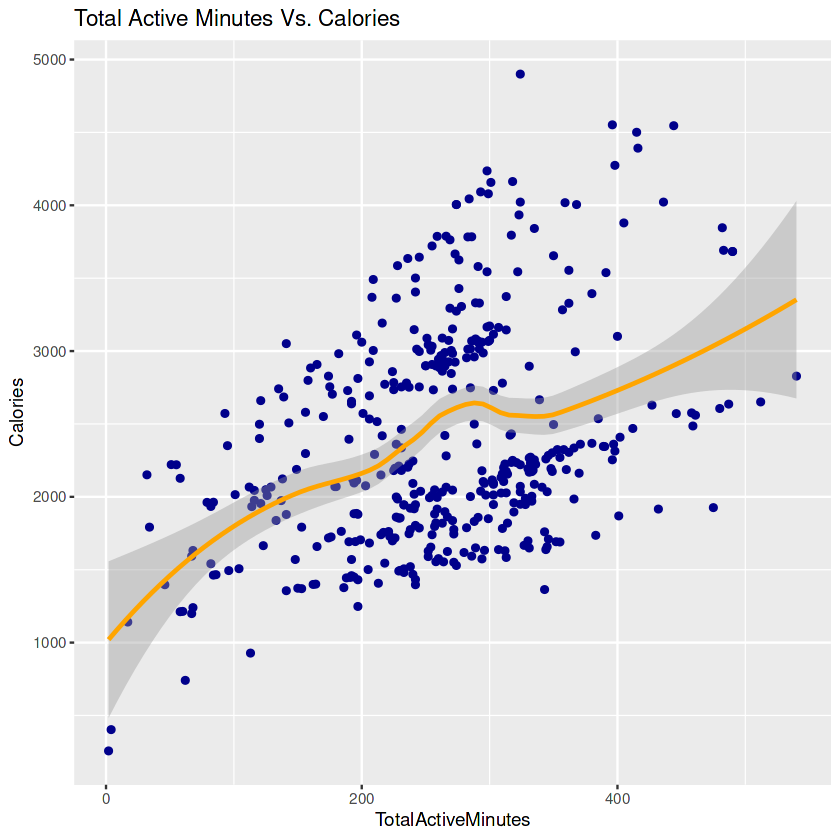

In [50]:
TotalActiveMinutes <- (merged_data$VeryActiveMinutes + merged_data$FairlyActiveMinutes + merged_data$LightlyActiveMinutes)
ggplot(data=merged_data, aes(y=Calories, x=TotalActiveMinutes)) +
  geom_point(stat="identity", color="darkblue") + geom_smooth(color="orange") +
  labs(title="Total Active Minutes Vs. Calories")

Here we notice that there is a postive correlation between the total minutes someone is active and how many calories they burn. Typically, the more you move, the more you burn!

Now let's see if more time asleep correlates to more total active minutes.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


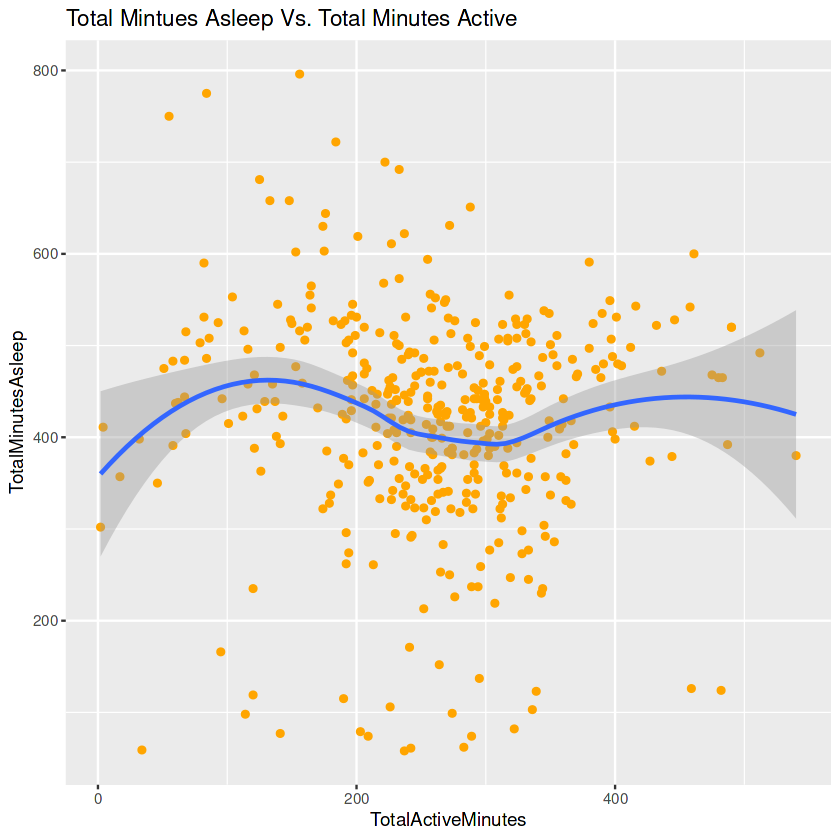

In [51]:
ggplot(data=merged_data, aes(y=TotalMinutesAsleep, x=TotalActiveMinutes)) +
  geom_point(stat="identity", color="orange") + geom_smooth() +
  labs(title="Total Mintues Asleep Vs. Total Minutes Active")

From this chart we notice that there isn't much of a positive or negative correlation between total minutes asleep and total active minutes. Would this change given more sleep? 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


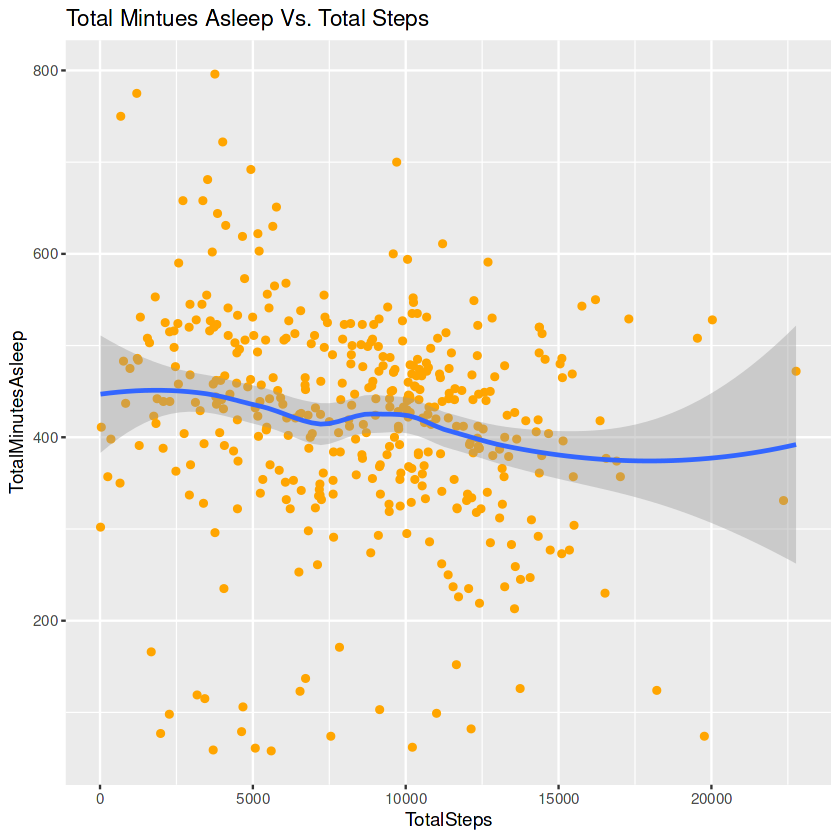

In [52]:
ggplot(data=merged_data, aes(y=TotalMinutesAsleep, x=TotalSteps)) +
  geom_point(stat="identity", color="orange") + geom_smooth() +
  labs(title="Total Mintues Asleep Vs. Total Steps")

**Our Findings & Stakeholder Recommendations**

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

There are multiple trends that were evident analyzing the FitBit smart device data. First, total steps and total active minutes are direclty and positively correlated to calories burned. The average steps per day is 7638 steps, which is actually quite good, but the 1st quartile is 3790 steps which is a little low. The lowest is 0 which indicates that on some days users did not wear their watch. Bellabeat could address this by sending notifications or reminders to get up and move 1x per hour. Bellabeat can also send out a reminder through their app to the user to wear the device and offer accolades for consistency. 

The CDC currently recommends 150 minutes of moderate physical exercise per week. Using the "fairly active" minutes from our analysis we see that the average is only 13.56 minutes per day. 13.56 minutes multiplied by 7 days is 94.92 mintues per week, which is below the recommended 150. So even if users work out 7 days per week, on average they are still not hitting the 150 mintue threshold. Bellabeat should emphasize the importance of moderate intesnity exercise. They can use their device and app to tell users when they hit moderate level intensity during exercise and alert them if they fall below. 

Another trend that is evident is that users spend more time in bed than asleep. This suggests that users have trouble falling or staying asleep. Another possibility is that users wake up and stay in bed for a period of time before getting up. Bellabeat can come up with marketing material on the importance of sleep and what users can do to optimize sleep. This could include no bright lights at night, no bluelight or phone close to your face a few hours before bed, and unwind with a book. It would be recommended to send users a notification when bed time is nearing and they can start this protocol. Bellabeat could even partner with a supplement company and offer their users a discount for natural sleep supplements such as Magensium Threonate, Theanine, and Apigenin. 

Bellabeat can use the findings in this analysis to influnce our the marketing strategy in a few ways. For example, new marketing material encompassing enhanced sleep and hitting the 150 minutes of moderate exercise per week would be a great start. Furthermore, developing a notification system to remind users about:

1. Getting up to move 1x per hour
2. Sleep protocol notification in the hours leading up to a set bed time
3. Alerting users when they have hit the moderate intensity exercise level
4. Friendly reminder to wear the device everyday and giving accolades for doing so

Bellabeat prides themselves on being an overall health and habit lifestyle company. Using these new findings, Bellabeat should create marketing material based on how their products can help women achieve and sustain healthy lifestyle habits. 

1. 7-9 hours of sleep everynight, education on circadian rhythm and sleep habits
2. At least 150 mintues of moderate intesnity per week and give examples on what that looks like
3. Promoting healthy habits like daily exercise, proper sleep, and proper hydration
4. Partnership with a supplement company to provide the resources that can assist in a healthy lifestyle (vitamins, protein, creatine, sleep supplements, etc)
5. Female focused content such as cycle-tracking and proper hormone balance
6. Community based support groups and workshops to bolster adherence to the lifestyle change
7. Decrease sedentary minutes by promoting standing desk for work.


